In [21]:
import trading_vix_env

In [22]:
local_env = trading_vix_env.trading_vix_env()

/home/zuhao/anaconda2/envs/p37/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [23]:
local_env.index_feature_dataframe

,vix_price_adj_close,vix_adj_close,mv_ratio,days_since_5,days_since_6,days_since_7
0,172.000000,11.070000,5.049115,4,34,167
1,180.479996,12.540000,5.649338,5,35,168
2,174.559998,11.190000,5.036545,6,36,169
3,170.080002,11.110000,4.999308,7,37,170
4,169.600006,10.890000,4.906989,8,38,171
...,...,...,...,...,...,...
995,26.090000,17.750000,4.863391,22,26,99
996,28.360001,20.700001,5.593985,1,27,100
997,26.500000,17.889999,4.839229,2,28,101
998,25.270000,16.660000,4.535959,3,29,102


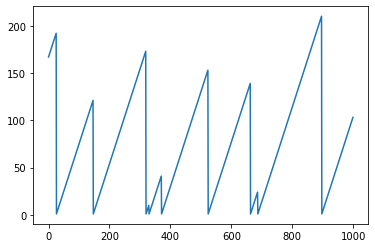

In [25]:
import matplotlib.pyplot as plt
plt.plot(local_env.index_feature_dataframe['days_since_7'])
plt.show()

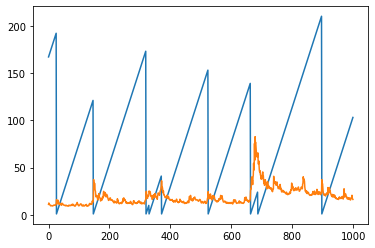

In [26]:
plt.plot(local_env.index_feature_dataframe['days_since_7'])
plt.plot(local_env.index_feature_dataframe['vix_adj_close'])
plt.show()

In [1]:
from stable_baselines3 import A2C

In [4]:
model = A2C.load('./a2c_data/best_model.zip')

In [5]:
model.policy

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (shared_net): Sequential()
    (policy_net): Sequential(
      (0): Linear(in_features=6, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=6, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=1, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)

In [19]:
model.policy.mlp_extractor.policy_net.state_dict()

OrderedDict([('0.weight',
              tensor([[-7.4997e-02, -7.1656e-02, -1.8552e-01,  6.9454e-02,  1.5652e-01,
                        7.5606e-02],
                      [ 1.6535e-02,  2.1409e-01,  2.6701e-01,  3.6273e-02, -1.0511e-01,
                       -7.1688e-02],
                      [-4.3036e-02,  2.1788e-02,  7.7800e-02, -9.6995e-02,  9.9836e-02,
                       -4.6026e-02],
                      [ 2.8914e-01,  5.0495e-02, -1.2954e-01, -2.2032e-01,  1.2066e-02,
                        2.6135e-01],
                      [ 8.6101e-02,  2.8967e-02, -2.1447e-01,  3.5806e-01, -1.7500e-01,
                        2.8005e-02],
                      [-3.0088e-01,  1.2130e-01,  2.7908e-01, -1.5013e-01, -3.0338e-01,
                        8.0048e-02],
                      [ 2.5571e-01,  1.7067e-01,  2.2803e-01,  4.4221e-02, -2.2161e-01,
                       -1.2461e-01],
                      [ 1.1604e-01,  2.5096e-01,  3.1951e-03, -1.0752e-01, -1.1088e-01,
           

In [20]:
model.policy.action_net.state_dict()

OrderedDict([('weight',
              tensor([[-0.0898, -0.0683,  0.1033,  0.0189, -0.0018,  0.0369,  0.0050,  0.0052,
                        0.0023, -0.0043,  0.0411,  0.0046,  0.0139,  0.0360, -0.1134, -0.0010,
                       -0.0783, -0.0165, -0.0386,  0.0580, -0.0289,  0.0471, -0.0400,  0.0195,
                        0.0975,  0.0609,  0.0565,  0.0697,  0.0218,  0.0065, -0.0030, -0.0203,
                       -0.0351,  0.0201, -0.0374, -0.0489,  0.0477,  0.0409, -0.0010,  0.0638,
                       -0.0338, -0.0802,  0.0409,  0.0086, -0.0410,  0.0709,  0.0491, -0.0138,
                       -0.0035, -0.0059,  0.0071,  0.0386, -0.0429,  0.0480,  0.0058,  0.0353,
                        0.0413,  0.0372, -0.0298,  0.0615,  0.1091, -0.0243, -0.0474, -0.0777]],
                     device='cuda:0')),
             ('bias', tensor([0.0078], device='cuda:0'))])

In [17]:
model.policy.mlp_extractor.policy_net.parameters()

<generator object Module.parameters at 0x7f7e703ad550>

In [7]:
model.policy

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (shared_net): Sequential()
    (policy_net): Sequential(
      (0): Linear(in_features=6, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=6, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=1, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)

In [6]:
model = A2C.load('./ppo_data/best_model.zip')

In [7]:
import trading_vix_env

In [8]:
local_env = trading_vix_env.trading_vix_env()

/home/zuhao/anaconda2/envs/p37/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [9]:
local_env.index_feature_dataframe

,vix_price_adj_close,vix_adj_close,mv_ratio,days_since_5,days_since_6,days_since_7
0,172.000000,11.070000,5.049115,4,34,167
1,180.479996,12.540000,5.649338,5,35,168
2,174.559998,11.190000,5.036545,6,36,169
3,170.080002,11.110000,4.999308,7,37,170
4,169.600006,10.890000,4.906989,8,38,171
...,...,...,...,...,...,...
995,26.090000,17.750000,4.863391,22,26,99
996,28.360001,20.700001,5.593985,1,27,100
997,26.500000,17.889999,4.839229,2,28,101
998,25.270000,16.660000,4.535959,3,29,102


In [10]:
local_env.reset()

array([15.43      ,  4.27698997, 16.        , 39.        , 34.        ,
        0.        ])

In [11]:
local_env.current_time_index

404

In [13]:
local_env.index_feature_dataframe.iloc[local_env.current_time_index:local_env.current_time_index+5]

,vix_price_adj_close,vix_adj_close,mv_ratio,days_since_5,days_since_6,days_since_7
404,109.400002,15.430000,4.276990,16,39,34
405,109.040001,15.650000,4.371423,17,40,35
406,111.000000,16.219999,4.549964,18,41,36
407,107.239998,14.910000,4.226682,19,42,37
408,107.480003,14.880000,4.259364,20,43,38


In [20]:
local_env.index_feature_dataframe.iloc[local_env.current_time_index:local_env.current_time_index+5]['vix_adj_close']

404    15.430000
405    15.650000
406    16.219999
407    14.910000
408    14.880000
Name: vix_adj_close, dtype: float64

In [18]:
local_env.index_feature_dataframe.iloc[local_env.current_time_index:local_env.current_time_index+5]['vix_adj_close']

KeyError: 0

In [16]:
import numpy as np

In [17]:
np.mean(local_env.index_feature_dataframe.iloc[local_env.current_time_index:local_env.current_time_index+5]['vix_adj_close'])

15.417999799999999

In [1]:
import numpy as np

In [2]:
import trading_vix_env

In [3]:
local_env = trading_vix_env.trading_vix_env()

/home/zuhao/anaconda2/envs/p37/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
state = local_env.reset()

In [5]:
type(state)

numpy.ndarray

In [6]:
state.shape

(6,)

In [7]:
state

array([ 14.82      ,   5.44956836,   1.        ,  62.        ,
       103.        ,   0.        ])

In [8]:
np.reshape(state,(-1,))

array([ 14.82      ,   5.44956836,   1.        ,  62.        ,
       103.        ,   0.        ])

In [9]:
import gym
env = gym.make('Pendulum-v0')

In [10]:
gym_state = env.reset()

In [11]:
print(type(gym_state))
print(gym_state.shape)

<class 'numpy.ndarray'>
(3,)


In [12]:
state

array([ 14.82      ,   5.44956836,   1.        ,  62.        ,
       103.        ,   0.        ])

In [13]:
import numpy as np
np.reshape(state,(-1,)).shape

(6,)

In [14]:
from stable_baselines3.common.env_checker import check_env

In [15]:
vix_env = trading_vix_env.trading_vix_env()

/home/zuhao/anaconda2/envs/p37/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [16]:
check_env(vix_env, warn=True)

/home/zuhao/anaconda2/envs/p37/lib/python3.7/site-packages/stable_baselines3/common/env_checker.py:232: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  "We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


In [22]:
#training

In [23]:
vix_env = trading_vix_env.trading_vix_env()

In [24]:
vix_env.action_space

Box(0.0, 1.0, (1,), float32)

In [ ]:


def make_env(env_id, rank, seed=0):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    """
    def _init():
        env = gym.make(env_id)
        env.seed(seed + rank)
        return env

    return _init

In [ ]:
from stable_baselines3.common.env_util import make_vec_env,SubprocVecEnv

num_cpu = 10
train_env = env = SubprocVecEnv([make_env(vix_env, i) for i in range(num_cpu)], start_method='spawn')

In [ ]:
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env,SubprocVecEnv

env = make_vec_env(trading_vix_env.trading_vix_env,n_envs = 10)
model = A2C('MlpPolicy', env, verbose=1,n_steps = 10*201)
model.learn(total_timesteps=1000000000)


In [ ]:
def make_env(env_id, rank, seed=0):
    """
    Utility function for multiprocessed env.

    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environments you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    """
    def _init():
        env = gym.make(env_id)
        env.seed(seed + rank)
        return env
    return _init

def main():
    env_id = trading_vix_env.trading_vix_env
    num_cpu = 20  # Number of processes to use
    # Create the vectorized environment
    env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])

    model = A2C('MlpPolicy', env, verbose=1,n_steps = 201)
    model.learn(total_timesteps=25000)

    obs = env.reset()
    for _ in range(1000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

if __name__ == '__main__':
    main()

In [ ]:
import gym
import numpy as np


from stable_baselines3.common.vec_env import SubprocVecEnv


def make_env(env_id, rank, seed=0):
    """
    Utility function for multiprocessed env.

    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environments you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    """
    def _init():
        env = gym.make(env_id)
        env.seed(seed + rank)
        return env
    return _init

def main():
    env_id = "CartPole-v1"
    num_cpu = 4  # Number of processes to use
    # Create the vectorized environment
    env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])

    model = A2C('MlpPolicy', env, verbose=1)
    model.learn(total_timesteps=25000)

    obs = env.reset()
    for _ in range(1000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

if __name__ == '__main__':
    main()